In [9]:
#install.packages(c("deSolve", "rmarkdown"))

In [10]:
library(ggplot2)
library(rmarkdown) 
library(deSolve)

options(repr.plot.width = 12, repr.plot.height = 8)

In [11]:
time_interval <- seq(0, 9, by = 1)

time_interval

[1] 0 1 2 3 4 5 6 7 8 9

In [12]:
state <- c(x = 0)

In [13]:
parameters <- c()

In [14]:
model_fn <- function(t, state, parameters){
    with(as.list(c(state, parameters)), {
        dx <- 3

        return (list(dx))
    })
}

In [15]:
result <- ode(y = state, times = time_interval, func = model_fn, parms = parameters)

head(result, 10)

time,x
0,0
1,3
2,6
3,9
4,12
5,15
6,18
7,21
8,24
9,27


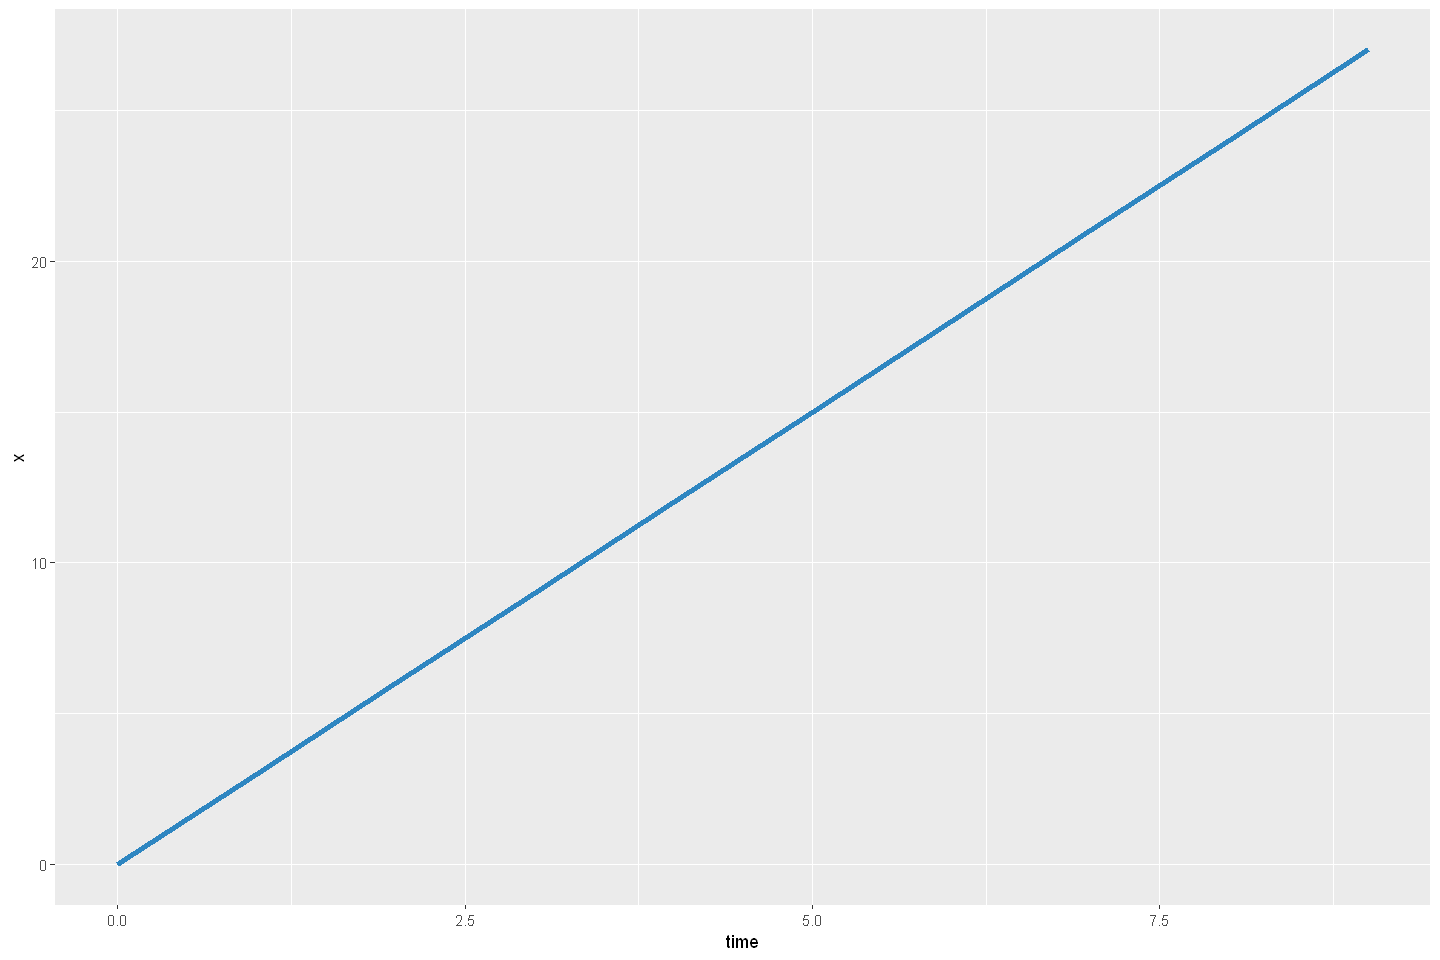

In [16]:
plot <- ggplot(data = as.data.frame(result), aes(time, x)) +
        geom_line(color = '#2E86C1', size = 1.5)

plot

In [17]:
time_interval <- seq(0, 9, by = 1)

state <- c(x = 3)

parameters <- c()

model_fn <- function(t, state, parameters) {
    with(as.list(c(state, parameters)), {
        dx <- 3*t

        return(list(dx))
    })
}

In [18]:
result <- ode(y = state, times = time_interval, func = model_fn, parms = parameters)

head(result, 1000)

time,x
0,3.000000
1,4.500003
2,9.000003
3,16.500003
4,27.000003
5,40.500003
6,57.000003
7,76.500003
8,99.000003
9,124.500003


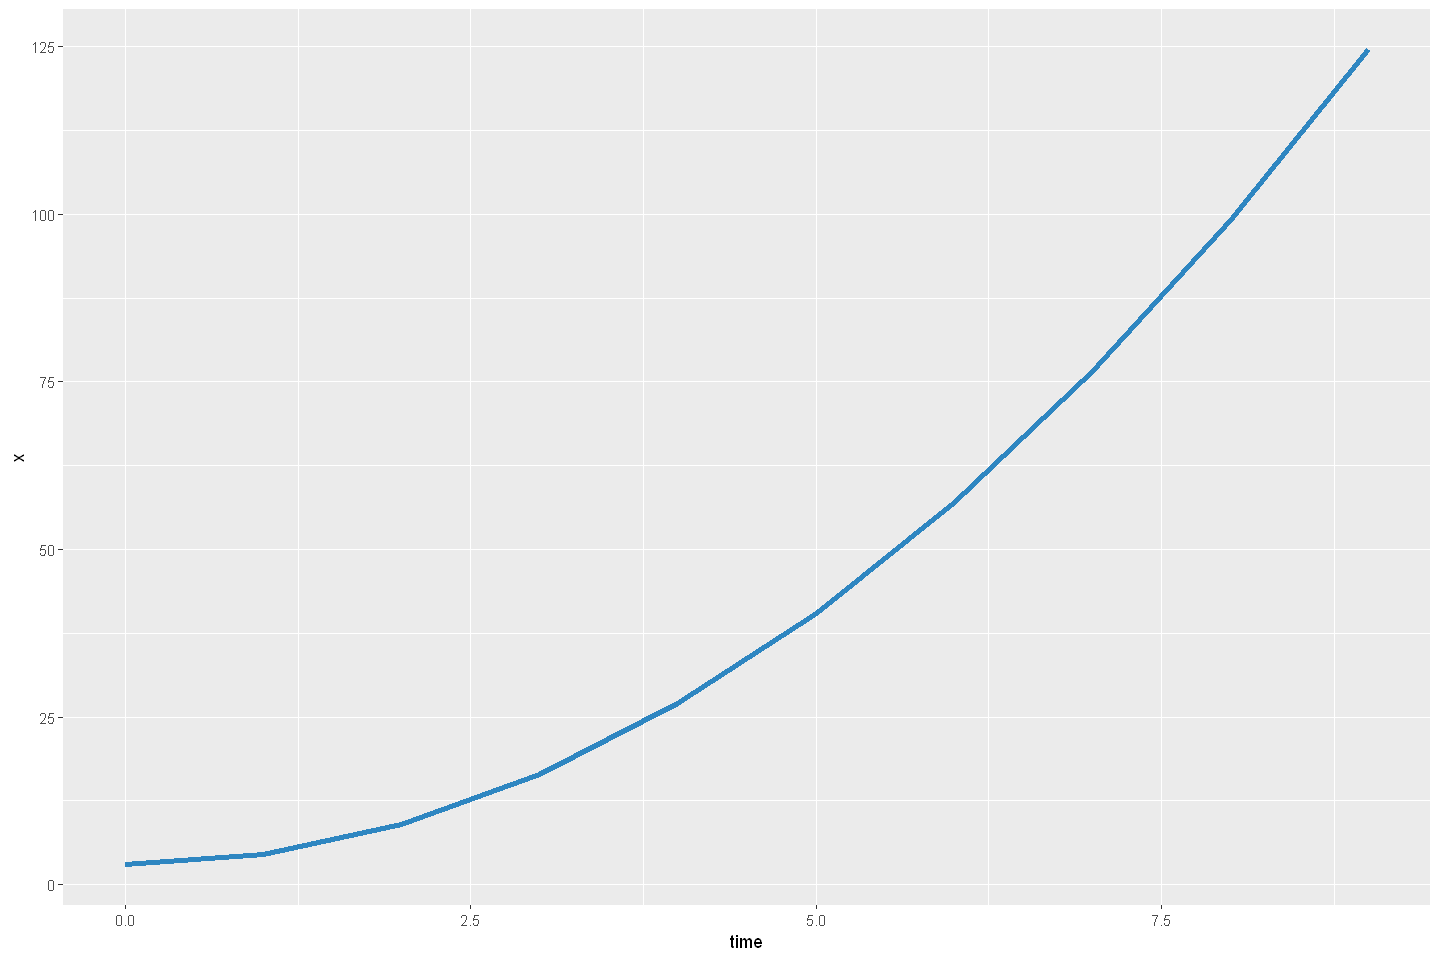

In [19]:
plot <- ggplot(data = as.data.frame(result), aes(time, x)) +
        geom_line(color = '#2E86C1', size = 1.5)

plot

In [20]:
time_interval <- seq(0, 9, by = 1)

state <- c(x = 4)

parameters <- c(k = 100)

model_fn <- function(t, state, parameters) {
    with(as.list(c(state, parameters)), {
        dx <- t*t + k

        return(list(dx))
    })
}

In [21]:
result <- ode(y = state, times = time_interval, func = model_fn, parms = parameters)

head(result, 1000)

time,x
0,4.0000
1,104.3333
2,206.6667
3,313.0000
4,425.3333
5,545.6667
6,676.0000
7,818.3333
8,974.6667
9,1147.0000


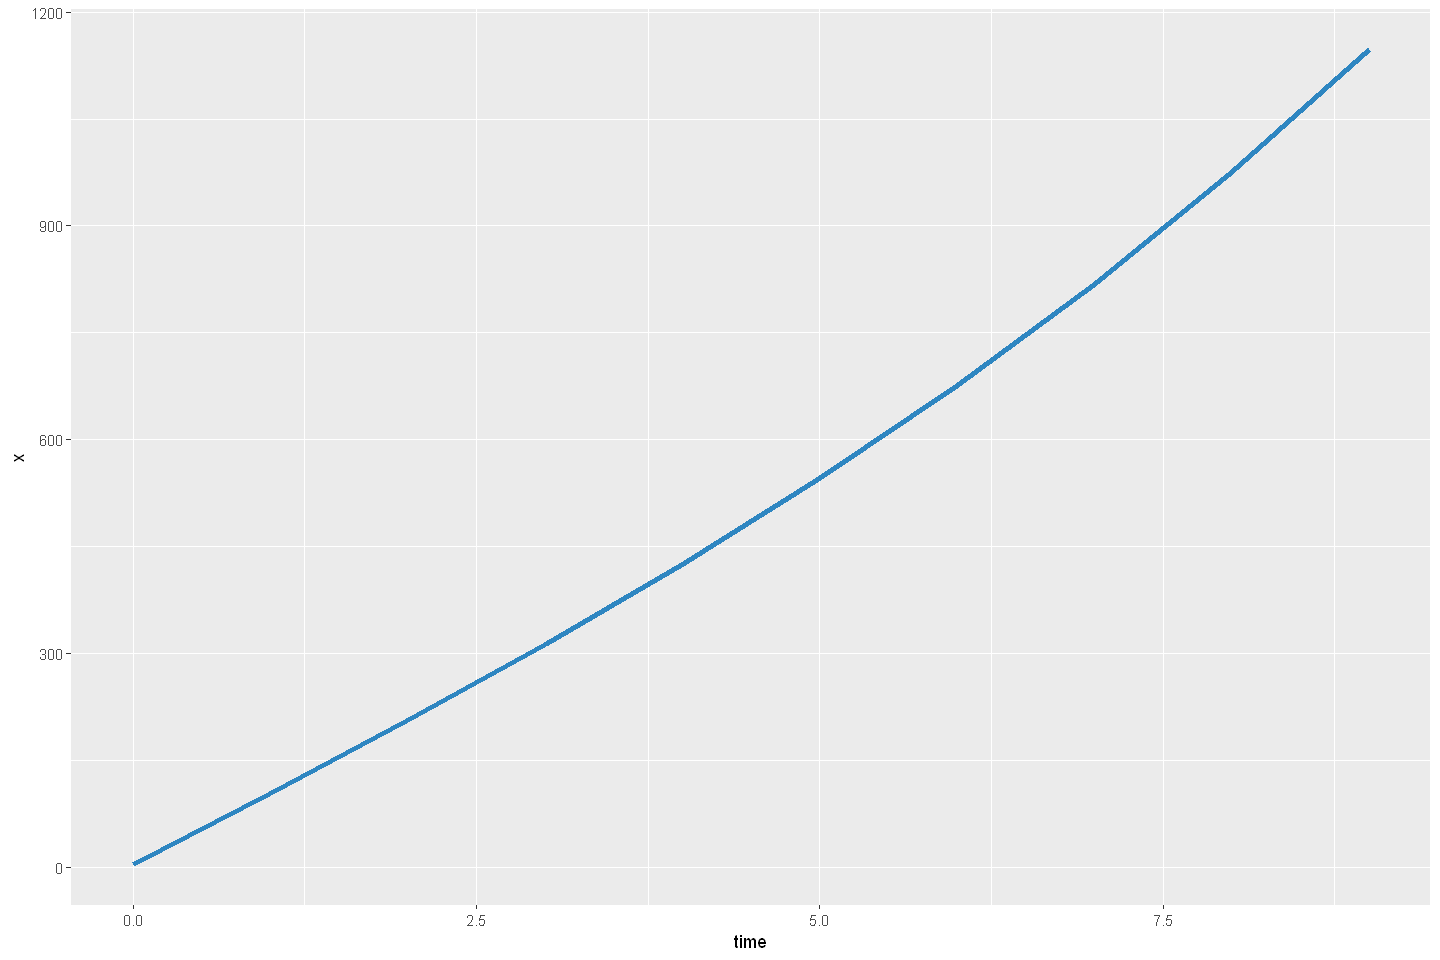

In [22]:
plot <- ggplot(data = as.data.frame(result), aes(time, x)) +
        geom_line(color = '#2E86C1', size = 1.5)

plot

In [23]:
time_interval <- seq(0, 10, by = 0.5)

time_interval

[1]  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0
[16]  7.5  8.0  8.5  9.0  9.5 10.0

In [24]:
diff_func <- function(x, k) {
    x * (1 - k*x)
}

In [25]:
state <- c(x = 0.1)

In [26]:
k <- 0.2

result_list <- c()

In [27]:
result_list[1] <- state

In [28]:
for (i in 1:(length(time_interval) -1)) {
    result_list[i + 1] = result_list[i] + 0.5 * diff_func(result_list[i], k)
}

In [29]:
result_list

[1] 0.1000000 0.1490000 0.2212799 0.3270234 0.4798406 0.6967362 0.9965602
 [8] 1.3955271 1.8985411 2.4873658 3.1123498 3.6998526 4.1808880 4.5233495
[15] 4.7389552 4.8626632 4.9294454 4.9642249 4.9819845 4.9909598 4.9954717

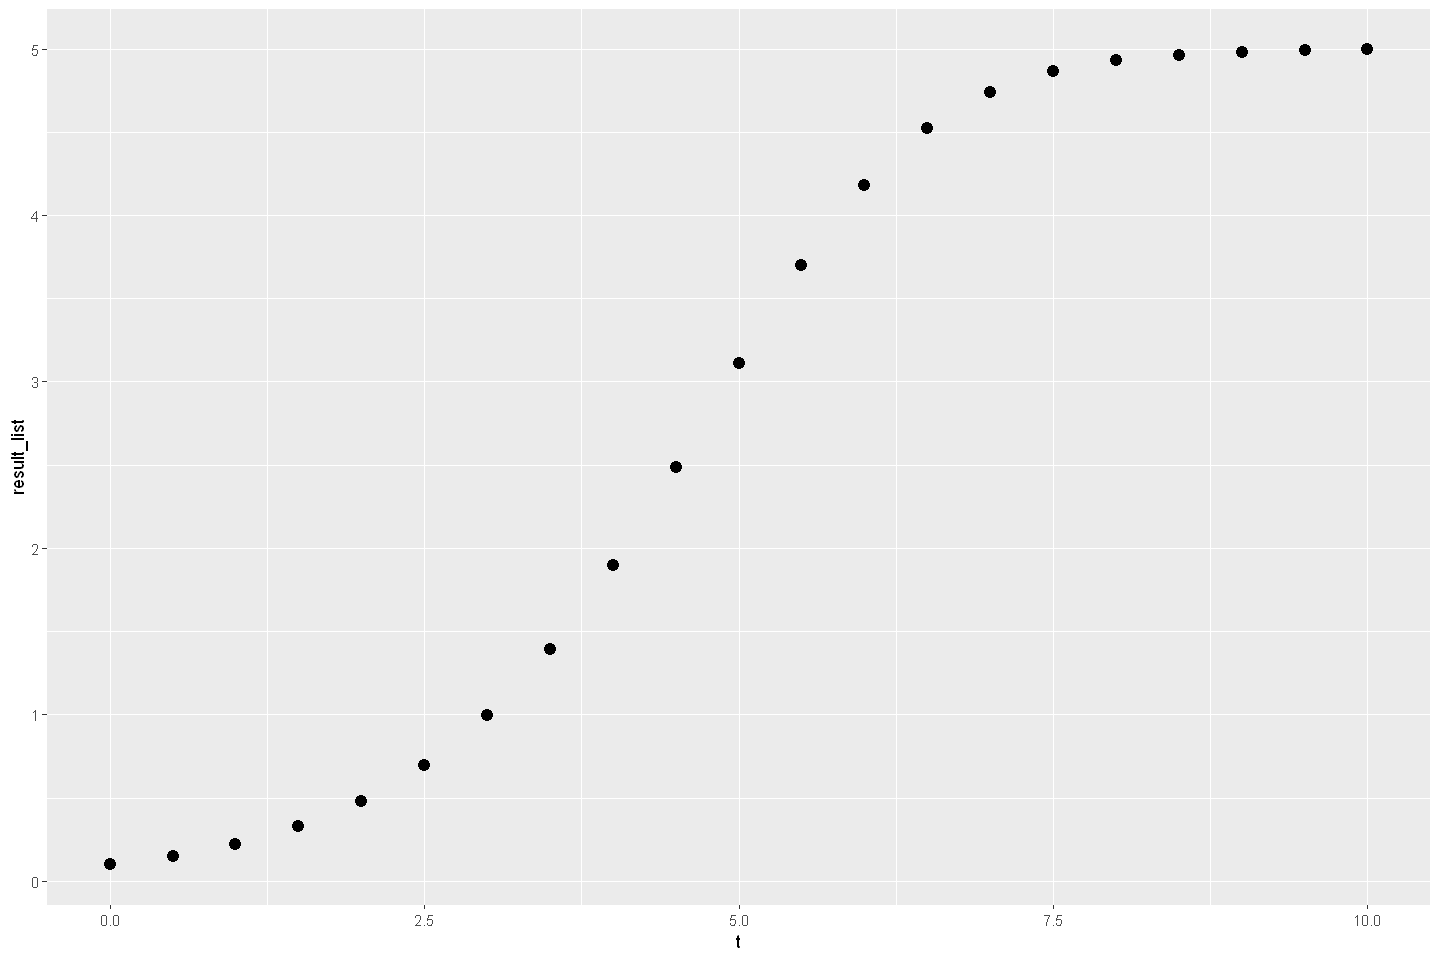

In [30]:
approximation <- ggplot(data = data.frame(p = result_list, t = time_interval), aes(t, result_list)) + geom_point(size = 3)

print(approximation)

In [31]:
parameters <- c(k = 0.2)

In [32]:
model_fn <- function(t, state, parameters) {
    with(as.list(c(state, parameters)), {
        dx <- x * (1 - k * x)

        return(list(dx))
    })
}

In [33]:
result <- ode(y = state, times = time_interval, func = model_fn, parms = parameters)

head(result, 10)

time,x
0.0,0.1000000
0.5,0.1627619
1.0,0.2627987
1.5,0.4189936
2.0,0.6551831
2.5,0.9955795
3.0,1.4536600
3.5,2.0163866
4.0,2.6350863
4.5,3.2376200


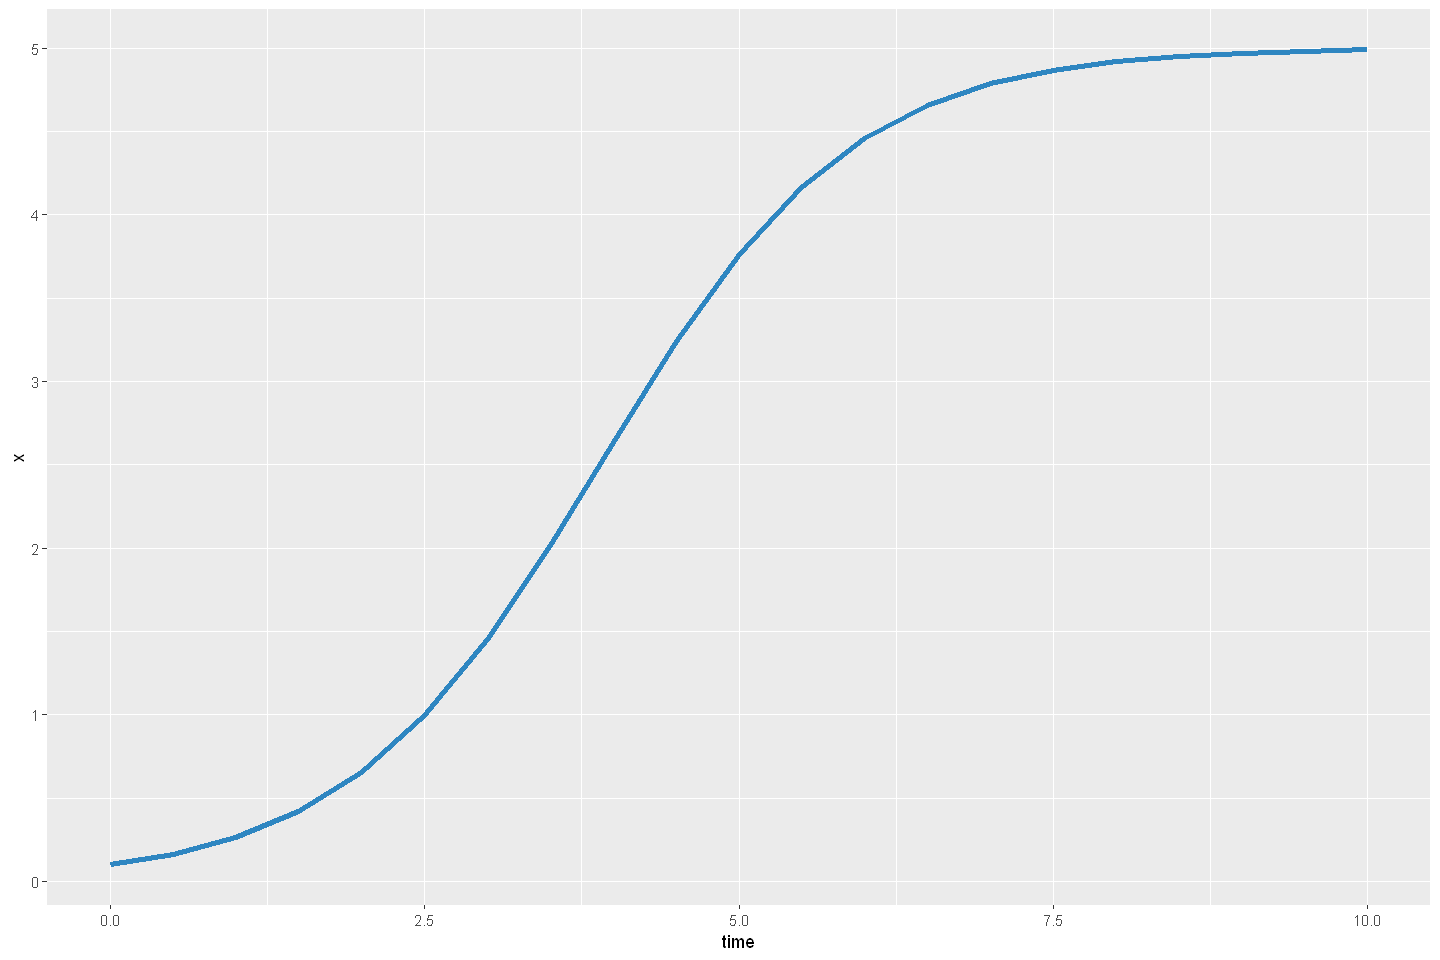

In [34]:
ggplot(data = as.data.frame(result), aes(time, x)) + geom_line(color = "#2E86C1", size = 1.5)

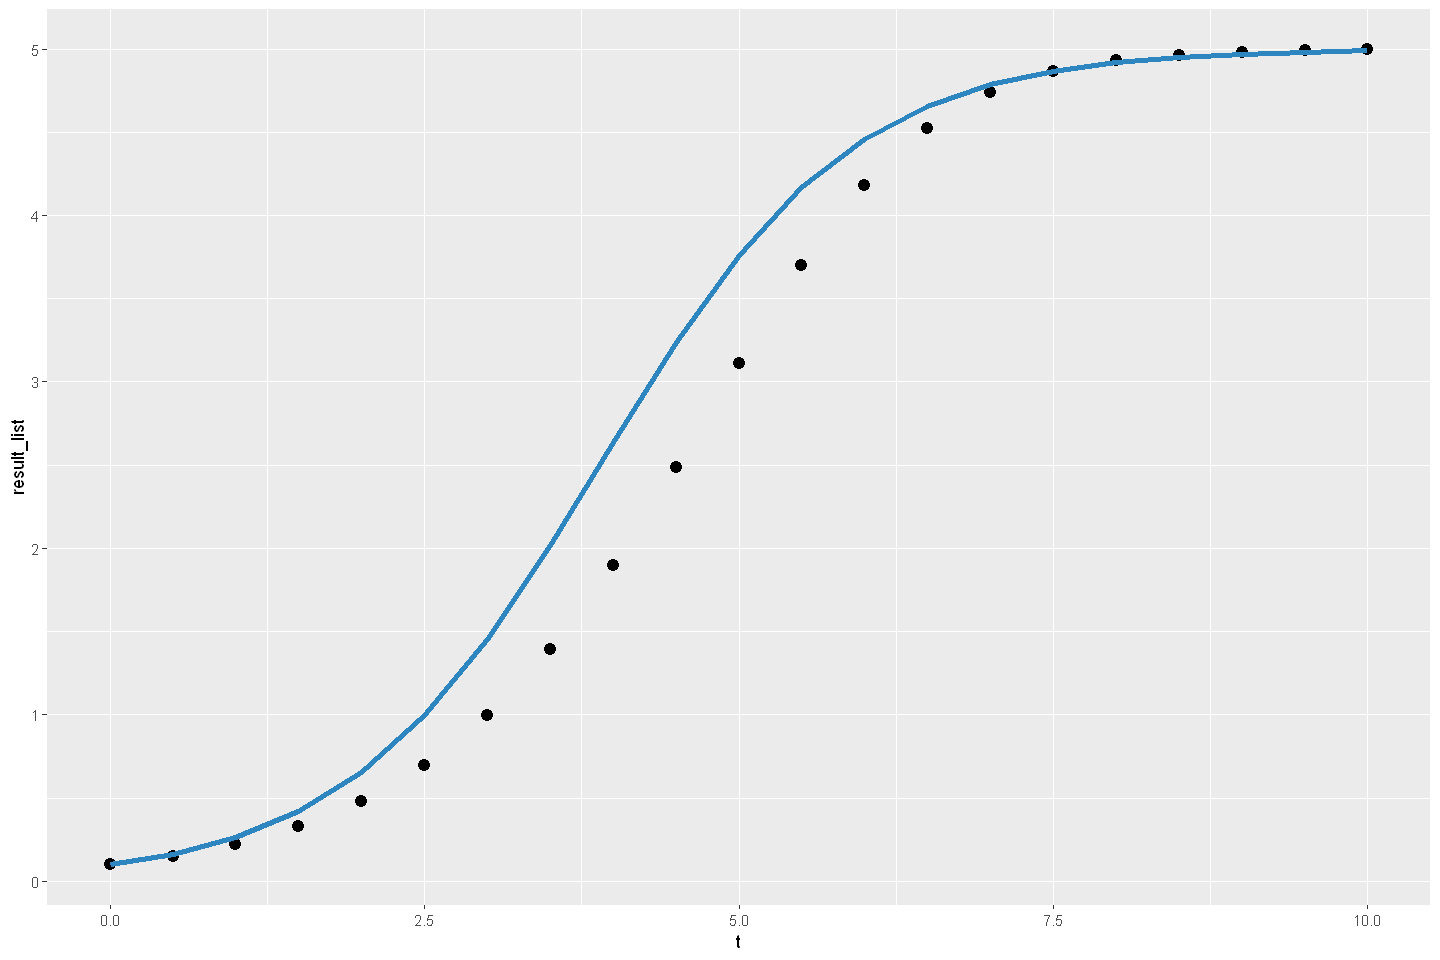

In [35]:
ggplot() + geom_point(data = data.frame(p = result_list, t = time_interval), aes(t, result_list), size =3) + geom_line(data = as.data.frame(result), aes(time, x), color = "#2E86C1", size = 1.5)

In [36]:
time_interval <- seq(from = 0, to = 12, by = 0.05)

In [37]:
parameters <- c(r = 1.3, k = 12)

In [38]:
state <- c(x = 0.1)

In [39]:
model_fn <- function(t, state, parameters) {
    with(as.list(c(state, parameters)), {
        dx <- r * x * (1 - x / k)

        return(list(dx))
    })
}

In [40]:
result <- ode(y = state, times = time_interval, func = model_fn, parms = parameters) 

head(result,10)

time,x
0.00,0.1000000
0.05,0.1066570
0.10,0.1137525
0.15,0.1213143
0.20,0.1293739
0.25,0.1379627
0.30,0.1471146
0.35,0.1568655
0.40,0.1672536
0.45,0.1783192


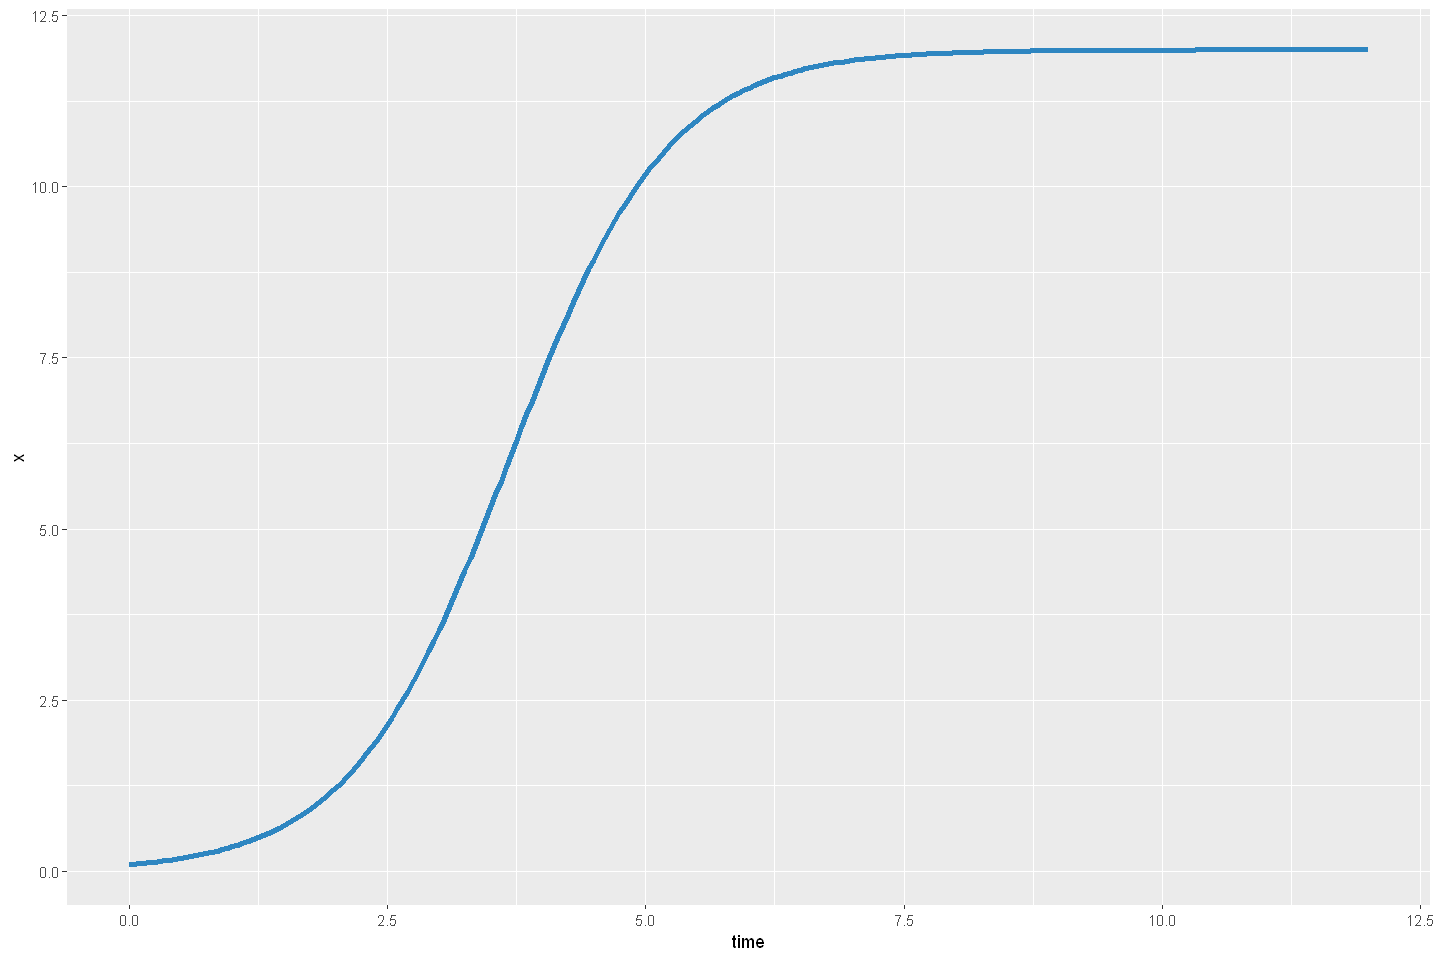

In [41]:
plot <- ggplot(data = as.data.frame(result), aes(time, x)) + geom_line(color = "#2E86C1", size = 1.5)

plot